[[-5.90951292e-01 -4.25864900e-01]
 [ 3.87074820e-01  2.84653292e-01]
 [-3.27059029e-01  7.12040071e-01]
 [-1.69544717e+00 -3.83418549e-01]
 [ 1.29831144e+00 -3.83904460e-01]
 [ 7.28106108e-01  6.51895333e-01]
 [-7.82175157e-01  1.75341557e+00]
 [ 5.70657123e-01  9.24425166e-02]
 [-4.11199905e-01  3.60566311e-01]
 [-1.79589601e-01 -8.82170253e-01]
 [ 1.13247248e+00  1.56623775e-01]
 [ 2.93987817e-01 -1.22133631e+00]
 [-2.31369837e+00  4.00488976e-01]
 [ 7.77345032e-01 -9.65380272e-01]
 [-2.46524922e-01  4.85027325e-01]
 [-2.29676770e-01  1.36589521e-01]
 [-7.16887655e-01  3.09665250e-01]
 [-1.96815030e-01 -6.60676145e-01]
 [-6.67548693e-01  1.30594713e-01]
 [ 6.80862620e-01 -1.11599576e+00]
 [-8.36525304e-01 -1.06316225e-01]
 [ 8.08042952e-02 -1.85553117e+00]
 [ 1.23522257e+00 -7.80342289e-01]
 [-2.76245063e-04 -9.22987637e-01]
 [-2.47645742e-01  2.21348955e+00]
 [ 1.17220729e+00 -4.81890170e-01]
 [ 5.06109670e-01  2.03063993e+00]
 [-1.69769977e+00 -3.72975291e-01]
 [-1.54175972e-01 -7

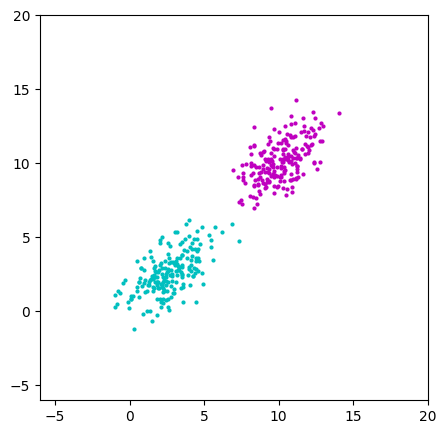

In [1]:
import numpy as np
import matplotlib.pyplot as plt

NumDataPerClass  = 200

m1 = [2.5, 2.5]
m2 = [10, 10]

C = [[2, 1], [1, 2]]

A = np.linalg.cholesky(C) # Cholesky decomposition matrix = A


U1 = np.random.randn(NumDataPerClass, 2) # U1 = dataset 1. 2 columns represents two features.
X1 = U1 @ A.T + m1  #  transforms the random data points U1 into a dataset that has mean m1 and covariance matrix C.
U2 = np.random.randn(NumDataPerClass, 2) # U2 = dataset 2
X2 = U2 @ A.T + m2


print(U1)
# plots.
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X1[:, 0], X1[:, 1], c="c", s=4) # size = 4,  collor = cyan, X1[:, 0] => All rows in the first column.
ax.scatter(X2[:, 0], X2[:, 1], c="m", s=4)
ax.set_xlim(-6, 20)
ax.set_ylim(-6, 20)
plt.show()


A = np.linalg.cholesky(C)


The Cholesky decomposition is a matrix factorization method that decomposes a positive-definite matrix into a lower triangular matrix and its conjugate transpose.
In this context, A will be a lower triangular matrix such that C = A @ A.T.


U1 = np.random.randn(NumDataPerClass, 2)


NumDataPerClass: Specifies the number of rows in the matrix. Each row represents a data point.
2: Specifies the number of columns in the matrix. Each column represents a feature.Each row represents a data point.

In [2]:
X = np.concatenate((X1, X2), axis=0) # axis = 0; to concatenate vertically.
O = np.ones((2 * NumDataPerClass, 1))
X = np.append(X, O, axis=1)
# The 2 datasets that has mean m1 and covariance matrix C are concatenated into a one matrix.

print(X)

print(X.shape) # shape of the X. In this case its 400. (400 * 2)


labelPos = np.ones(NumDataPerClass)
labelNeg =-1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg)) # y have 400 entires.


# Generate random datasets ->
rIndex = np.random.permutation(2*NumDataPerClass) # rIndex is an array of 400 entries.

print(rIndex.shape)

# Shuffle the array X that has feature and its values. And array y that has -1, +1. to randomize the samples.
Xr = X[rIndex]  # this have 2 columns, 800 elements (400 * 2).
yr = y[rIndex] # Yr have single array, 400 elements.

# now we have features set(Xr), and they are classified into 2 classes (-1 and +1).

# Training and test sets (half half)

# create training dataset. (200)
X_train = Xr[0:NumDataPerClass] # Values got from X.
y_train = yr[0:NumDataPerClass] # Values got from y. (+1, -1)

# create testing dataset. (200)
X_test = Xr[NumDataPerClass:2*NumDataPerClass] # Values got from X.
y_test = yr[NumDataPerClass:2*NumDataPerClass] # Values got from y. (+1, -1)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

print(X_train)
print(y_train)

Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;

[[ 1.66426867  1.56055848  1.        ]
 [ 3.04740646  3.12233089  1.        ]
 [ 2.03746869  3.14080177  1.        ]
 ...
 [10.44540832 12.52417325  1.        ]
 [ 9.32678205  9.61256017  1.        ]
 [11.686031   12.51973169  1.        ]]
(400, 3)
(400,)
(200, 3) (200,) (200, 3) (200,)
[[ 6.96537723e+00  9.54418169e+00  1.00000000e+00]
 [ 9.00231896e+00  1.08125391e+01  1.00000000e+00]
 [ 6.90524574e+00  5.92728969e+00  1.00000000e+00]
 [ 3.31846420e+00  2.98405002e+00  1.00000000e+00]
 [ 7.75842140e-01  2.95707925e+00  1.00000000e+00]
 [ 9.07048291e+00  8.62374606e+00  1.00000000e+00]
 [ 7.26376797e+00  9.05976458e+00  1.00000000e+00]
 [ 2.59308511e+00  2.71620052e+00  1.00000000e+00]
 [ 9.60131422e+00  1.10692217e+01  1.00000000e+00]
 [ 3.49349726e+00  3.12053706e+00  1.00000000e+00]
 [ 1.16860310e+01  1.25197317e+01  1.00000000e+00]
 [ 1.01729167e+01  9.67203813e+00  1.00000000e+00]
 [ 1.23553890e+01  1.01190663e+01  1.00000000e+00]
 [ 2.43620890e+00  2.07046869e+00  1.00000000e+00

5. Calculating the percentage of correctly classified examples

 - One class is typically labeled as -1.
 - The other class is labeled as +1.

In [3]:
# return the percentage of correct O/Ps.
# Inputs =  input features
# targets =  actual values should be got once given the input.
# weights = weights calculated fot

def PercentCorrect(Inputs, targets, weights):
  N = len(targets)
  nCorrect = 0
  for n in range(N):
    OneInput = Inputs[n,:]
    if (targets[n] * np.dot(OneInput, weights) > 0):
      nCorrect += 1

  return 100*nCorrect/N



6. Iterative error correcting learning

In [4]:

# Perceptron learning loop

# Random initialization of weights
# Create a matirx with 2 elements that have std = 1 and mean = 0.
# These are the initial predictions for w1 and w2.
w = np.random.randn(3)
print(w)


# What is the performance with the initial random weights? check for initial prediction.

print('Initial Percentage Correct: %6.2f' % (PercentCorrect(X_train, y_train, w)))


# Fixed number of iterations (think of better stopping criterion)
MaxIter = 4000
# Learning rate (change this to see convergence changing)
alpha = 0.001

# Space to save answers for plotting - we plot them later.

P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

# Main Loop

for iter in range(MaxIter):
    # Select a data item at random
    # Ntrain  = 200 (number of test data)
    r = np.floor(np.random.rand() * Ntrain).astype(int)
    # finally, r gets integer between 0 - 199.

    x = X_train[r, :]
    # x is one random feature set.
    # If it is misclassified, update weights

    # w1 * x1 + w2 * x2 = y^
    # to be a correct prediction, y^ and y_train[r] should be at least same sign.

    if (y_train[r] * np.dot(x, w) < 0):
        # if its negative we should update the w.
        # if y^ => (+), y => (-); w should be decreased. should be added some value to it.

        w += alpha * y_train[r] * x


    # Evaluate training and test performances for plotting

    P_train[iter] = PercentCorrect(X_train, y_train, w);
    P_test[iter] = PercentCorrect(X_test, y_test, w);
    print('Percentage Correct After Training: %6.2f %6.2f' % (
    PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))


[1.44830041 3.56364389 0.36576914]
Initial Percentage Correct:  46.50
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00
Percentage Correct After Training:  46.50  53.00

7. Plot learnig curves.

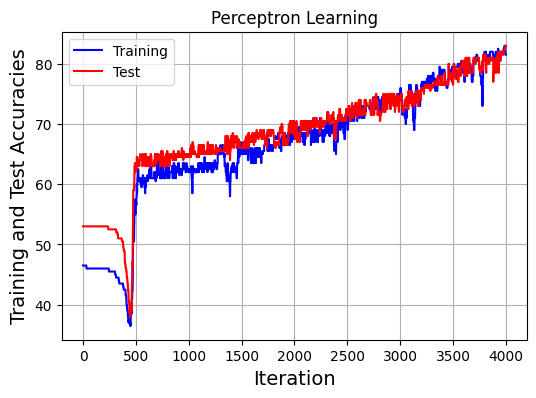

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')


9. your perceptron algorithm on the two-class Gaussian dataset
 with that of the perceptron tool in the scikitlearn package

Accuracy on training set:   1.00
Accuracy on test set:   1.00
Wow, Perfect Classification on Separable dataset!


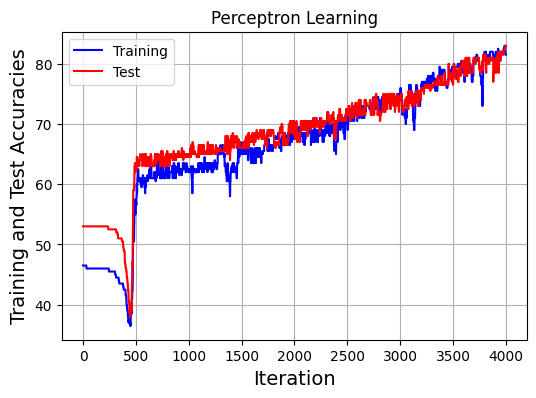

In [6]:
# Scikitlearn can do it for us

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# create the model for perception algorithem.
model = Perceptron()

# train the model using data -> just like finding w values.
model.fit(X_train, y_train)

# yh_train = use trained model and X_train to predict the values for y.
yh_train = model.predict(X_train)

# find the accuracy score. for training data set.
print("Accuracy on training set: %6.2f" %(accuracy_score(yh_train, y_train)))


# yh_test - use trained model and X_test to predict the values for y. this time with trst data.
yh_test = model.predict(X_test)

# find the accuracy score.
print("Accuracy on test set: %6.2f" %(accuracy_score(yh_test, y_test)))
if (accuracy_score(yh_test, y_test) > 0.99):
  print("Wow, Perfect Classification on Separable dataset!")

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')